# Evolution of Einstein's equations

# Initial data constants definition

# Initial data , setting length of the domain and discretization


In [1]:
m=1;
res=m;
N=2.0^m*100.0;
Rf=1.0;

dx=Rf/N;
dt=round(dx*0.4,digits=10);
Nt=100.0*2^m;
Tf=Nt*dt; #final time

println("the final time is ", Tf)

the final time is 0.4


In [2]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)
println("epsilon <= dx/dt * (1/2)^(2*2-1) = ", dx/dt*(1/2)^(2*2-1))

println("epsilon = dx/dt * (1/2)^(2*2) = ", dx/dt*(1/2)^(2*2))

println("epsilon = dx/dt * (1/2)^(2*3) = ", dx/dt*(1/2)^(2*3))

dx =0.005
dt =0.002
dx/dt =2.5
epsilon <= dx/dt * (1/2)^(2*2-1) = 0.3125
epsilon = dx/dt * (1/2)^(2*2) = 0.15625
epsilon = dx/dt * (1/2)^(2*3) = 0.0390625


In [3]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res$res"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1"

In [4]:
println(dx)
println(dt)

0.005
0.002


In [5]:
epsilon=0.01##0.01#0.05; #05; #02;#0.05; #0.05; #0.05;#0.05;#0.05; #dissipation strength (-1 for backwards integration)

0.01

# Grid

In [6]:
ori=0.0;
R1 = nothing
R1=range(ori, stop=Rf, step=dx);

print(size(R1))

(201,)

In [7]:
print(dx)
#R = range(ori-2.0*dx, stop=Rf+2.0*dx, step=dx);
R = range(round(ori-3.0*dx,digits=10), stop=Rf+3.0*dx, step=dx)

L=length(R);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
T=range(0,stop=Tf-dt,step=dt)
println("the time step is ", dt)
println(size(T))
println(size(R))

println(R[L-3])
println(L)

0.005step size is  0.005
the time step is 0.002
(200,)
(207,)
1.0
207


In [8]:
include("./ScalarField.jl");

In [9]:
using Interpolations

# Initial data of m β Ψ and Ψ,x

In [26]:
initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initpsibar=zeros(L);
state_array=[initm initbeta initpsi initpsibar];

#sin and cos psi psi'
"#PSI BAR
sigma = 0.3
r0 = 0.7
psibar0=1
#initpsibar[4:L-3] = exp.(-((R1 ./ (1 .- R1) .- r0) ./ sigma) .^2) .* R1 .^2 .* (3 .* (R1 .- 1) .^2 .* sigma^2 - 2 .* R1 .* (r0 .* (R1 .- 1) .+ R1)) .* (R1 .- 1).^(-6) .*sigma^(-2)
initpsibar[4:L-3] = rungekutta4(SFconstraint_psibar,psibar0,R1)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);

#PSI
psi0=0
initpsi[4:L-3]=sin.(R1)#rk4wrapper(SFconstraint_psi,psi0,R1,0)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);"

#PSI BAR

#psibar0=1
c=0.25
sigma=0.1
Amp=0.05
initpsibar[4:L-3] = scalar_spaceder(R1)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);

"""#PSI
psi0=0
initpsi[4:L-3] = scalar_field(R1)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);"""

#PSI FROM PSI,X
interp = cubic_spline_interpolation(R[4:L-3], state_array[4:L-3,4],  extrapolation_bc = Line())
psi0=0
SFconstraint_psi_new(psi0,R1) = interp.(R1)
initpsi = rungekutta4(SFconstraint_psi_new,psi0,R)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);


#BETA
beta0=0
initbeta[4:L-3]=rk4wrapper(SFconstraint_beta,beta0,R1,0)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);


#M
m0=0
initm[4:L-3]=rk4wrapper(SFconstraint_m,m0,R1,0)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);

R=0!!!R=0!!!

# Defining the initial state array for the evolution m β Ψ and Ψ,x

just debugging

In [27]:
"int(x) = floor(Int, x)
print(int.([0.2 1.9]))

a=R1/dx
println(a[3])
println((R1/dx)[3])
println(state_array[int((R1/dx)[1])+1,4])
println(state_array[int((R1[1]/dx+1)),4])
println(state_array[1,4])

println(state_array[int.(R1./dx.+1),4])
println(state_array[:,4])"

"int(x) = floor(Int, x)\nprint(int.([0.2 1.9]))\n\na=R1/dx\nprintln(a[3])\nprintln((R1/dx)[3])\nprintln(state_array[int((R1/dx)[1])+1,4])\nprintln(state_array[int((R1[1]/dx+1)),4])\nprintln(state_array[1,4])\n\nprintln(state_array[int.(R1./dx.+1),4])\nprintln(state_array[:,4])"

In [28]:
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);
using CSV, Tables
CSV.write(dir*"/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step0.csv"

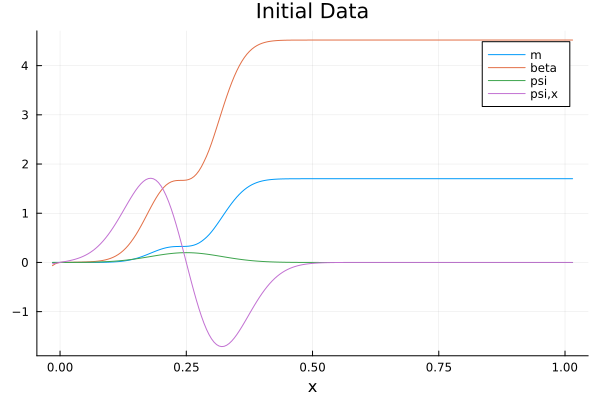

In [34]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R, state_array, xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

In [167]:
using Interpolations
using ProgressMeter
@showprogress for k in 1:10
    
    #evolve psi,x
    state_array=rungekutta4molstep(SF_RHS,state_array,T,k,0) #evolve psi,x
    state_array=ghost(state_array)
    
    #calculate psi from psi,x
    interp = cubic_spline_interpolation(R[4:L-3], state_array[4:L-3,4],  extrapolation_bc = Line())

    psi0=0
    SFconstraint_psi_new(psi0,R1) = interp.(R1)

    state_array[:,3] = rungekutta4(SFconstraint_psi_new,psi0,R)
    
    
    CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end

i = 4 dy[4] = 0.0
i = 5 dy[4] = 2.0437227911791135e-5
i = 6 dy[4] = 2.4662596889822483e-5
i = 7 dy[4] = 3.2675237910601675e-5
i = 8 dy[4] = 4.5069216014928064e-5
i = 9 dy[4] = 6.309958796197136e-5
i = 10 dy[4] = 8.848933390928862e-5
i = 11 dy[4] = 0.00012350527994756255
i = 12 dy[4] = 0.00017104276460160216
i = 13 dy[4] = 0.00023471237158079436
i = 14 dy[4] = 0.00031891940054575116
i = 15 dy[4] = 0.00042892308249856706
i = 16 dy[4] = 0.0005708549303579136
i = 17 dy[4] = 0.0007516981763733868
i = 18 dy[4] = 0.000979072256339015
i = 19 dy[4] = 0.0012611771283592688
i = 20 dy[4] = 0.0016058085417956227
i = 21 dy[4] = 0.002020299408254996
i = 22 dy[4] = 0.0025098413410149126
i = 23 dy[4] = 0.003075084261546685
i = 24 dy[4] = 0.0037150927666678756
i = 25 dy[4] = 0.004405835286120514
i = 26 dy[4] = 0.005138450739061351
i = 27 dy[4] = 0.005827189616226404
i = 28 dy[4] = 0.006608053001260578
i = 29 dy[4] = 0.007386070690114557
i = 30 dy[4] = 0.008449945437994846
i = 31 dy[4] = 0.01064072429447

i = 79 dy[4] = 1.9168939090327395e-10
i = 80 dy[4] = 9.128703710792417e-11
i = 81 dy[4] = 4.16155932912917e-11
i = 82 dy[4] = 1.9826163757594437e-11
i = 83 dy[4] = 1.0389285840528017e-11
i = 84 dy[4] = 5.326517731989487e-12
i = 85 dy[4] = 3.043907780182887e-12
i = 86 dy[4] = 1.6683306658226793e-12
i = 87 dy[4] = 7.860745527819312e-13
i = 88 dy[4] = 3.464986841145408e-13
i = 89 dy[4] = 1.7731061687049278e-13
i = 90 dy[4] = 9.192948086196124e-14
i = 91 dy[4] = 4.430076504477015e-14
i = 92 dy[4] = 1.614963261713594e-14
i = 93 dy[4] = 4.24495682717039e-15
i = 94 dy[4] = 9.021916447090133e-16
i = 95 dy[4] = -3.0886208467052413e-16
i = 96 dy[4] = -7.148413166176259e-16
i = 97 dy[4] = -8.01725298995622e-16
i = 98 dy[4] = -6.817904350859306e-16
i = 99 dy[4] = -5.068041158330793e-16
i = 100 dy[4] = -3.639041708556456e-16
i = 101 dy[4] = -2.5605079767137973e-16
i = 102 dy[4] = -1.776298000756617e-16
i = 103 dy[4] = -1.21238279080034e-16
i = 104 dy[4] = -8.160227115227474e-17
i = 105 dy[4] = -5.4

i = 148 dy[4] = -2.381724159839075e-28
i = 149 dy[4] = -1.2804365459228835e-28
i = 150 dy[4] = -7.905081418378558e-29
i = 151 dy[4] = -5.751731017821156e-29
i = 152 dy[4] = -4.816374913253586e-29
i = 153 dy[4] = -4.397797765340307e-29
i = 154 dy[4] = -4.2260440952788643e-29
i = 155 dy[4] = -4.157574415979422e-29
i = 156 dy[4] = -4.126229076709422e-29
i = 157 dy[4] = -4.1101988334408935e-29
i = 158 dy[4] = -4.1022251152173354e-29
i = 159 dy[4] = -4.105717178336985e-29
i = 160 dy[4] = -4.107517949583651e-29
i = 161 dy[4] = -4.109297071125929e-29
i = 162 dy[4] = -4.11105495323152e-29
i = 163 dy[4] = -4.112791996162651e-29
i = 164 dy[4] = -4.1145085900948985e-29
i = 165 dy[4] = -4.116205115737861e-29
i = 166 dy[4] = -4.1178819446931955e-29
i = 167 dy[4] = -4.119539439342123e-29
i = 168 dy[4] = -4.121177953728372e-29
i = 169 dy[4] = -4.1227978329346734e-29
i = 170 dy[4] = -4.1243994144202324e-29
i = 171 dy[4] = -4.125983027455056e-29
i = 172 dy[4] = -4.127548993513443e-29
i = 173 dy[4] = -4

i = 4 dy[4] = 0.0
i = 5 dy[4] = 2.2472993203575462e-5
i = 6 dy[4] = 2.5433755794265136e-5
i = 7 dy[4] = 3.478109761306099e-5
i = 8 dy[4] = 4.8035785660771626e-5
i = 9 dy[4] = 6.738254782830055e-5
i = 10 dy[4] = 9.444232643781977e-5
i = 11 dy[4] = 0.00013165305103294092
i = 12 dy[4] = 0.00018203005369124873
i = 13 dy[4] = 0.0002493391213725301
i = 14 dy[4] = 0.0003381507710785522
i = 15 dy[4] = 0.0004538972885557673
i = 16 dy[4] = 0.0006028890494184999
i = 17 dy[4] = 0.0007922537404852173
i = 18 dy[4] = 0.001029750887480181
i = 19 dy[4] = 0.0013235999219942784
i = 20 dy[4] = 0.0016814922649087925
i = 21 dy[4] = 0.0021106488735321617
i = 22 dy[4] = 0.002615234171869162
i = 23 dy[4] = 0.0031962939218646126
i = 24 dy[4] = 0.0038484825076865016
i = 25 dy[4] = 0.004551251755816199
i = 26 dy[4] = 0.005280595911004798
i = 27 dy[4] = 0.005976830015645426
i = 28 dy[4] = 0.006771997676196215
i = 29 dy[4] = 0.007558331800896287
i = 30 dy[4] = 0.00878759752759597
i = 31 dy[4] = 0.011157932169434403

i = 81 dy[4] = 1.593562133298036e51
i = 82 dy[4] = 2.98027954976725e51
i = 83 dy[4] = 4.851791378870405e51
i = 84 dy[4] = 6.043707120320665e51
i = 85 dy[4] = 7.34963937609735e51
i = 86 dy[4] = 7.792081722543461e51
i = 87 dy[4] = 6.508881501192154e51
i = 88 dy[4] = 4.713868122578191e51
i = 89 dy[4] = 3.834220156135535e51
i = 90 dy[4] = 3.106171189269341e51
i = 91 dy[4] = 2.3176506168649192e51
i = 92 dy[4] = 1.2991130185056058e51
i = 93 dy[4] = 5.219616729636171e50
i = 94 dy[4] = 1.681935127283398e50
i = 95 dy[4] = -9.45666066021508e49
i = 96 dy[4] = -3.3050528856017983e50
i = 97 dy[4] = -5.764695149934941e50
i = 98 dy[4] = -7.69848037049251e50
i = 99 dy[4] = -9.05802423038002e50
i = 100 dy[4] = -1.037025575467478e51
i = 101 dy[4] = -1.1719845074067319e51
i = 102 dy[4] = -1.3155590335822718e51
i = 103 dy[4] = -1.463789935064185e51
i = 104 dy[4] = -1.6182904209117876e51
i = 105 dy[4] = -1.784057709850607e51
i = 106 dy[4] = -1.9623042813324113e51
i = 107 dy[4] = -2.1540242573502926e51
i = 

i = 155 dy[4] = -4.370386133481651e52
i = 156 dy[4] = -4.560072208537098e52
i = 157 dy[4] = -4.7553488852447093e52
i = 158 dy[4] = -4.956287682376636e52
i = 159 dy[4] = -5.162958839804244e52
i = 160 dy[4] = -5.375431296422273e52
i = 161 dy[4] = -5.593772669982337e52
i = 162 dy[4] = -5.818049238268767e52
i = 163 dy[4] = -6.048325922073885e52
i = 164 dy[4] = -6.284666268907873e52
i = 165 dy[4] = -6.527132439167281e52
i = 166 dy[4] = -6.775785193424563e52
i = 167 dy[4] = -7.030683880352964e52
i = 168 dy[4] = -7.29188642763625e52
i = 169 dy[4] = -7.559449331683264e52
i = 170 dy[4] = -7.833427652019799e52
i = 171 dy[4] = -8.11387500362134e52
i = 172 dy[4] = -8.400843552101118e52
i = 173 dy[4] = -8.694384009883898e52
i = 174 dy[4] = -8.994545633963046e52
i = 175 dy[4] = -9.301376223653417e52
i = 176 dy[4] = -9.614922119927903e52
i = 177 dy[4] = -9.935228205454576e52
i = 178 dy[4] = -1.0262337907330542e53
i = 179 dy[4] = -1.0596293198356075e53
i = 180 dy[4] = -1.0937134599415338e53
i = 181 dy

Progress:  20%|████████▎                                |  ETA: 0:00:03

i = 4 dy[4] = 0.0
i = 5 dy[4] = 744425.066115484
i = 6 dy[4] = -2.5697961191735365e6
i = 7 dy[4] = 9.544957016299615e6
i = 8 dy[4] = -3.5610031952432744e7
i = 9 dy[4] = 1.3289517081467043e8
i = 10 dy[4] = -4.9597065136192256e8
i = 11 dy[4] = 1.8509874347991815e9
i = 12 dy[4] = -6.907979088850927e9
i = 13 dy[4] = 2.578092893599801e10
i = 14 dy[4] = -9.621573686809598e10
i = 15 dy[4] = -7.874864489205161e45
i = 16 dy[4] = -1.3401123822217158e12
i = 17 dy[4] = -Inf
i = 18 dy[4] = -1.8665363588768953e13
i = 19 dy[4] = -Inf
i = 20 dy[4] = -2.5997564544866078e14
i = 21 dy[4] = -Inf
i = 22 dy[4] = -3.6210563575154535e15
i = 23 dy[4] = -Inf
i = 24 dy[4] = -5.0439543464617896e16
i = 25 dy[4] = -Inf
i = 26 dy[4] = -7.028504262357412e17
i = 27 dy[4] = -Inf
i = 28 dy[4] = -9.8048421187614e18
i = 29 dy[4] = -Inf
i = 30 dy[4] = -1.368791247243531e20
i = 31 dy[4] = Inf
i = 32 dy[4] = -1.8543720595317352e21
i = 33 dy[4] = Inf
i = 34 dy[4] = -1.5361438391715024e22
i = 35 dy[4] = Inf
i = 36 dy[4] = 8.35

i = 166 dy[4] = -Inf
i = 167 dy[4] = -Inf
i = 168 dy[4] = -Inf
i = 169 dy[4] = -Inf
i = 170 dy[4] = -Inf
i = 171 dy[4] = -Inf
i = 172 dy[4] = -Inf
i = 173 dy[4] = -Inf
i = 174 dy[4] = -Inf
i = 175 dy[4] = -Inf
i = 176 dy[4] = -Inf
i = 177 dy[4] = -Inf
i = 178 dy[4] = -Inf
i = 179 dy[4] = -Inf
i = 180 dy[4] = -Inf
i = 181 dy[4] = -Inf
i = 182 dy[4] = -Inf
i = 183 dy[4] = -Inf
i = 184 dy[4] = -Inf
i = 185 dy[4] = -Inf
i = 186 dy[4] = -Inf
i = 187 dy[4] = -Inf
i = 188 dy[4] = -Inf
i = 189 dy[4] = -Inf
i = 190 dy[4] = -Inf
i = 191 dy[4] = -Inf
i = 192 dy[4] = -Inf
i = 193 dy[4] = -Inf
i = 194 dy[4] = -Inf
i = 195 dy[4] = -Inf
i = 196 dy[4] = -Inf
i = 197 dy[4] = -Inf
i = 198 dy[4] = -Inf
i = 199 dy[4] = -Inf
i = 200 dy[4] = -Inf
i = 201 dy[4] = -Inf
i = 202 dy[4] = -Inf
i = 203 dy[4] = -Inf
i = 204 dy[4] = -Inf
i = 4 dy[4] = 0.0
i = 5 dy[4] = 744425.066115484
i = 6 dy[4] = -2.5697961191735365e6
i = 7 dy[4] = 9.544957016299615e6
i = 8 dy[4] = -3.5610031952432744e7
i = 9 dy[4] = 1.3289517081

i = 128 dy[4] = -Inf
i = 129 dy[4] = -Inf
i = 130 dy[4] = -Inf
i = 131 dy[4] = -Inf
i = 132 dy[4] = -Inf
i = 133 dy[4] = -Inf
i = 134 dy[4] = -Inf
i = 135 dy[4] = -Inf
i = 136 dy[4] = -Inf
i = 137 dy[4] = -Inf
i = 138 dy[4] = -Inf
i = 139 dy[4] = -Inf
i = 140 dy[4] = -Inf
i = 141 dy[4] = -Inf
i = 142 dy[4] = -Inf
i = 143 dy[4] = -Inf
i = 144 dy[4] = -Inf
i = 145 dy[4] = -Inf
i = 146 dy[4] = -Inf
i = 147 dy[4] = -Inf
i = 148 dy[4] = -Inf
i = 149 dy[4] = -Inf
i = 150 dy[4] = -Inf
i = 151 dy[4] = -Inf
i = 152 dy[4] = -Inf
i = 153 dy[4] = -Inf
i = 154 dy[4] = -Inf
i = 155 dy[4] = -Inf
i = 156 dy[4] = -Inf
i = 157 dy[4] = -Inf
i = 158 dy[4] = -Inf
i = 159 dy[4] = -Inf
i = 160 dy[4] = -Inf
i = 161 dy[4] = -Inf
i = 162 dy[4] = -Inf
i = 163 dy[4] = -Inf
i = 164 dy[4] = -Inf
i = 165 dy[4] = -Inf
i = 166 dy[4] = -Inf
i = 167 dy[4] = -Inf
i = 168 dy[4] = -Inf
i = 169 dy[4] = -Inf
i = 170 dy[4] = -Inf
i = 171 dy[4] = -Inf
i = 172 dy[4] = -Inf
i = 173 dy[4] = -Inf
i = 174 dy[4] = -Inf
i = 175 dy[4]

Progress:  30%|████████████▎                            |  ETA: 0:00:02

i = 4 dy[4] = 0.0
i = 5 dy[4] = NaN
i = 6 dy[4] = NaN
i = 7 dy[4] = NaN
i = 8 dy[4] = NaN
i = 9 dy[4] = NaN
i = 10 dy[4] = NaN
i = 11 dy[4] = NaN
i = 12 dy[4] = NaN
i = 13 dy[4] = NaN
i = 14 dy[4] = NaN
i = 15 dy[4] = NaN
i = 16 dy[4] = NaN
i = 17 dy[4] = NaN
i = 18 dy[4] = NaN
i = 19 dy[4] = NaN
i = 20 dy[4] = NaN
i = 21 dy[4] = NaN
i = 22 dy[4] = NaN
i = 23 dy[4] = NaN
i = 24 dy[4] = NaN
i = 25 dy[4] = NaN
i = 26 dy[4] = NaN
i = 27 dy[4] = NaN
i = 28 dy[4] = NaN
i = 29 dy[4] = NaN
i = 30 dy[4] = NaN
i = 31 dy[4] = NaN
i = 32 dy[4] = NaN
i = 33 dy[4] = NaN
i = 34 dy[4] = NaN
i = 35 dy[4] = NaN
i = 36 dy[4] = NaN
i = 37 dy[4] = NaN
i = 38 dy[4] = NaN
i = 39 dy[4] = NaN
i = 40 dy[4] = NaN
i = 41 dy[4] = NaN
i = 42 dy[4] = NaN
i = 43 dy[4] = NaN
i = 44 dy[4] = NaN
i = 45 dy[4] = NaN
i = 46 dy[4] = NaN
i = 47 dy[4] = NaN
i = 48 dy[4] = NaN
i = 49 dy[4] = NaN
i = 50 dy[4] = NaN
i = 51 dy[4] = NaN
i = 52 dy[4] = NaN
i = 53 dy[4] = NaN
i = 54 dy[4] = NaN
i = 55 dy[4] = NaN
i = 56 dy[4] = NaN

i = 129 dy[4] = NaN
i = 130 dy[4] = NaN
i = 131 dy[4] = NaN
i = 132 dy[4] = NaN
i = 133 dy[4] = NaN
i = 134 dy[4] = NaN
i = 135 dy[4] = NaN
i = 136 dy[4] = NaN
i = 137 dy[4] = NaN
i = 138 dy[4] = NaN
i = 139 dy[4] = NaN
i = 140 dy[4] = NaN
i = 141 dy[4] = NaN
i = 142 dy[4] = NaN
i = 143 dy[4] = NaN
i = 144 dy[4] = NaN
i = 145 dy[4] = NaN
i = 146 dy[4] = NaN
i = 147 dy[4] = NaN
i = 148 dy[4] = NaN
i = 149 dy[4] = NaN
i = 150 dy[4] = NaN
i = 151 dy[4] = NaN
i = 152 dy[4] = NaN
i = 153 dy[4] = NaN
i = 154 dy[4] = NaN
i = 155 dy[4] = NaN
i = 156 dy[4] = NaN
i = 157 dy[4] = NaN
i = 158 dy[4] = NaN
i = 159 dy[4] = NaN
i = 160 dy[4] = NaN
i = 161 dy[4] = NaN
i = 162 dy[4] = NaN
i = 163 dy[4] = NaN
i = 164 dy[4] = NaN
i = 165 dy[4] = NaN
i = 166 dy[4] = NaN
i = 167 dy[4] = NaN
i = 168 dy[4] = NaN
i = 169 dy[4] = NaN
i = 170 dy[4] = NaN
i = 171 dy[4] = NaN
i = 172 dy[4] = NaN
i = 173 dy[4] = NaN
i = 174 dy[4] = NaN
i = 175 dy[4] = NaN
i = 176 dy[4] = NaN
i = 177 dy[4] = NaN
i = 178 dy[4] = NaN


Progress:  40%|████████████████▍                        |  ETA: 0:00:02

i = 4 dy[4] = 0.0
i = 5 dy[4] = NaN
i = 6 dy[4] = NaN
i = 7 dy[4] = NaN
i = 8 dy[4] = NaN
i = 9 dy[4] = NaN
i = 10 dy[4] = NaN
i = 11 dy[4] = NaN
i = 12 dy[4] = NaN
i = 13 dy[4] = NaN
i = 14 dy[4] = NaN
i = 15 dy[4] = NaN
i = 16 dy[4] = NaN
i = 17 dy[4] = NaN
i = 18 dy[4] = NaN
i = 19 dy[4] = NaN
i = 20 dy[4] = NaN
i = 21 dy[4] = NaN
i = 22 dy[4] = NaN
i = 23 dy[4] = NaN
i = 24 dy[4] = NaN
i = 25 dy[4] = NaN
i = 26 dy[4] = NaN
i = 27 dy[4] = NaN
i = 28 dy[4] = NaN
i = 29 dy[4] = NaN
i = 30 dy[4] = NaN
i = 31 dy[4] = NaN
i = 32 dy[4] = NaN
i = 33 dy[4] = NaN
i = 34 dy[4] = NaN
i = 35 dy[4] = NaN
i = 36 dy[4] = NaN
i = 37 dy[4] = NaN
i = 38 dy[4] = NaN
i = 39 dy[4] = NaN
i = 40 dy[4] = NaN
i = 41 dy[4] = NaN
i = 42 dy[4] = NaN
i = 43 dy[4] = NaN
i = 44 dy[4] = NaN
i = 45 dy[4] = NaN
i = 46 dy[4] = NaN
i = 47 dy[4] = NaN
i = 48 dy[4] = NaN
i = 49 dy[4] = NaN
i = 50 dy[4] = NaN
i = 51 dy[4] = NaN
i = 52 dy[4] = NaN
i = 53 dy[4] = NaN
i = 54 dy[4] = NaN
i = 55 dy[4] = NaN
i = 56 dy[4] = NaN

i = 129 dy[4] = NaN
i = 130 dy[4] = NaN
i = 131 dy[4] = NaN
i = 132 dy[4] = NaN
i = 133 dy[4] = NaN
i = 134 dy[4] = NaN
i = 135 dy[4] = NaN
i = 136 dy[4] = NaN
i = 137 dy[4] = NaN
i = 138 dy[4] = NaN
i = 139 dy[4] = NaN
i = 140 dy[4] = NaN
i = 141 dy[4] = NaN
i = 142 dy[4] = NaN
i = 143 dy[4] = NaN
i = 144 dy[4] = NaN
i = 145 dy[4] = NaN
i = 146 dy[4] = NaN
i = 147 dy[4] = NaN
i = 148 dy[4] = NaN
i = 149 dy[4] = NaN
i = 150 dy[4] = NaN
i = 151 dy[4] = NaN
i = 152 dy[4] = NaN
i = 153 dy[4] = NaN
i = 154 dy[4] = NaN
i = 155 dy[4] = NaN
i = 156 dy[4] = NaN
i = 157 dy[4] = NaN
i = 158 dy[4] = NaN
i = 159 dy[4] = NaN
i = 160 dy[4] = NaN
i = 161 dy[4] = NaN
i = 162 dy[4] = NaN
i = 163 dy[4] = NaN
i = 164 dy[4] = NaN
i = 165 dy[4] = NaN
i = 166 dy[4] = NaN
i = 167 dy[4] = NaN
i = 168 dy[4] = NaN
i = 169 dy[4] = NaN
i = 170 dy[4] = NaN
i = 171 dy[4] = NaN
i = 172 dy[4] = NaN
i = 173 dy[4] = NaN
i = 174 dy[4] = NaN
i = 175 dy[4] = NaN
i = 176 dy[4] = NaN
i = 177 dy[4] = NaN
i = 178 dy[4] = NaN


Progress:  50%|████████████████████▌                    |  ETA: 0:00:01

i = 4 dy[4] = 0.0
i = 5 dy[4] = NaN
i = 6 dy[4] = NaN
i = 7 dy[4] = NaN
i = 8 dy[4] = NaN
i = 9 dy[4] = NaN
i = 10 dy[4] = NaN
i = 11 dy[4] = NaN
i = 12 dy[4] = NaN
i = 13 dy[4] = NaN
i = 14 dy[4] = NaN
i = 15 dy[4] = NaN
i = 16 dy[4] = NaN
i = 17 dy[4] = NaN
i = 18 dy[4] = NaN
i = 19 dy[4] = NaN
i = 20 dy[4] = NaN
i = 21 dy[4] = NaN
i = 22 dy[4] = NaN
i = 23 dy[4] = NaN
i = 24 dy[4] = NaN
i = 25 dy[4] = NaN
i = 26 dy[4] = NaN
i = 27 dy[4] = NaN
i = 28 dy[4] = NaN
i = 29 dy[4] = NaN
i = 30 dy[4] = NaN
i = 31 dy[4] = NaN
i = 32 dy[4] = NaN
i = 33 dy[4] = NaN
i = 34 dy[4] = NaN
i = 35 dy[4] = NaN
i = 36 dy[4] = NaN
i = 37 dy[4] = NaN
i = 38 dy[4] = NaN
i = 39 dy[4] = NaN
i = 40 dy[4] = NaN
i = 41 dy[4] = NaN
i = 42 dy[4] = NaN
i = 43 dy[4] = NaN
i = 44 dy[4] = NaN
i = 45 dy[4] = NaN
i = 46 dy[4] = NaN
i = 47 dy[4] = NaN
i = 48 dy[4] = NaN
i = 49 dy[4] = NaN
i = 50 dy[4] = NaN
i = 51 dy[4] = NaN
i = 52 dy[4] = NaN
i = 53 dy[4] = NaN
i = 54 dy[4] = NaN
i = 55 dy[4] = NaN
i = 56 dy[4] = NaN

i = 129 dy[4] = NaN
i = 130 dy[4] = NaN
i = 131 dy[4] = NaN
i = 132 dy[4] = NaN
i = 133 dy[4] = NaN
i = 134 dy[4] = NaN
i = 135 dy[4] = NaN
i = 136 dy[4] = NaN
i = 137 dy[4] = NaN
i = 138 dy[4] = NaN
i = 139 dy[4] = NaN
i = 140 dy[4] = NaN
i = 141 dy[4] = NaN
i = 142 dy[4] = NaN
i = 143 dy[4] = NaN
i = 144 dy[4] = NaN
i = 145 dy[4] = NaN
i = 146 dy[4] = NaN
i = 147 dy[4] = NaN
i = 148 dy[4] = NaN
i = 149 dy[4] = NaN
i = 150 dy[4] = NaN
i = 151 dy[4] = NaN
i = 152 dy[4] = NaN
i = 153 dy[4] = NaN
i = 154 dy[4] = NaN
i = 155 dy[4] = NaN
i = 156 dy[4] = NaN
i = 157 dy[4] = NaN
i = 158 dy[4] = NaN
i = 159 dy[4] = NaN
i = 160 dy[4] = NaN
i = 161 dy[4] = NaN
i = 162 dy[4] = NaN
i = 163 dy[4] = NaN
i = 164 dy[4] = NaN
i = 165 dy[4] = NaN
i = 166 dy[4] = NaN
i = 167 dy[4] = NaN
i = 168 dy[4] = NaN
i = 169 dy[4] = NaN
i = 170 dy[4] = NaN
i = 171 dy[4] = NaN
i = 172 dy[4] = NaN
i = 173 dy[4] = NaN
i = 174 dy[4] = NaN
i = 175 dy[4] = NaN
i = 176 dy[4] = NaN
i = 177 dy[4] = NaN
i = 178 dy[4] = NaN


Progress:  60%|████████████████████████▋                |  ETA: 0:00:01

i = 4 dy[4] = 0.0
i = 5 dy[4] = NaN
i = 6 dy[4] = NaN
i = 7 dy[4] = NaN
i = 8 dy[4] = NaN
i = 9 dy[4] = NaN
i = 10 dy[4] = NaN
i = 11 dy[4] = NaN
i = 12 dy[4] = NaN
i = 13 dy[4] = NaN
i = 14 dy[4] = NaN
i = 15 dy[4] = NaN
i = 16 dy[4] = NaN
i = 17 dy[4] = NaN
i = 18 dy[4] = NaN
i = 19 dy[4] = NaN
i = 20 dy[4] = NaN
i = 21 dy[4] = NaN
i = 22 dy[4] = NaN
i = 23 dy[4] = NaN
i = 24 dy[4] = NaN
i = 25 dy[4] = NaN
i = 26 dy[4] = NaN
i = 27 dy[4] = NaN
i = 28 dy[4] = NaN
i = 29 dy[4] = NaN
i = 30 dy[4] = NaN
i = 31 dy[4] = NaN
i = 32 dy[4] = NaN
i = 33 dy[4] = NaN
i = 34 dy[4] = NaN
i = 35 dy[4] = NaN
i = 36 dy[4] = NaN
i = 37 dy[4] = NaN
i = 38 dy[4] = NaN
i = 39 dy[4] = NaN
i = 40 dy[4] = NaN
i = 41 dy[4] = NaN
i = 42 dy[4] = NaN
i = 43 dy[4] = NaN
i = 44 dy[4] = NaN
i = 45 dy[4] = NaN
i = 46 dy[4] = NaN
i = 47 dy[4] = NaN
i = 48 dy[4] = NaN
i = 49 dy[4] = NaN
i = 50 dy[4] = NaN
i = 51 dy[4] = NaN
i = 52 dy[4] = NaN
i = 53 dy[4] = NaN
i = 54 dy[4] = NaN
i = 55 dy[4] = NaN
i = 56 dy[4] = NaN

i = 129 dy[4] = NaN
i = 130 dy[4] = NaN
i = 131 dy[4] = NaN
i = 132 dy[4] = NaN
i = 133 dy[4] = NaN
i = 134 dy[4] = NaN
i = 135 dy[4] = NaN
i = 136 dy[4] = NaN
i = 137 dy[4] = NaN
i = 138 dy[4] = NaN
i = 139 dy[4] = NaN
i = 140 dy[4] = NaN
i = 141 dy[4] = NaN
i = 142 dy[4] = NaN
i = 143 dy[4] = NaN
i = 144 dy[4] = NaN
i = 145 dy[4] = NaN
i = 146 dy[4] = NaN
i = 147 dy[4] = NaN
i = 148 dy[4] = NaN
i = 149 dy[4] = NaN
i = 150 dy[4] = NaN
i = 151 dy[4] = NaN
i = 152 dy[4] = NaN
i = 153 dy[4] = NaN
i = 154 dy[4] = NaN
i = 155 dy[4] = NaN
i = 156 dy[4] = NaN
i = 157 dy[4] = NaN
i = 158 dy[4] = NaN
i = 159 dy[4] = NaN
i = 160 dy[4] = NaN
i = 161 dy[4] = NaN
i = 162 dy[4] = NaN
i = 163 dy[4] = NaN
i = 164 dy[4] = NaN
i = 165 dy[4] = NaN
i = 166 dy[4] = NaN
i = 167 dy[4] = NaN
i = 168 dy[4] = NaN
i = 169 dy[4] = NaN
i = 170 dy[4] = NaN
i = 171 dy[4] = NaN
i = 172 dy[4] = NaN
i = 173 dy[4] = NaN
i = 174 dy[4] = NaN
i = 175 dy[4] = NaN
i = 176 dy[4] = NaN
i = 177 dy[4] = NaN
i = 178 dy[4] = NaN


Progress:  70%|████████████████████████████▊            |  ETA: 0:00:01

i = 4 dy[4] = 0.0
i = 5 dy[4] = NaN
i = 6 dy[4] = NaN
i = 7 dy[4] = NaN
i = 8 dy[4] = NaN
i = 9 dy[4] = NaN
i = 10 dy[4] = NaN
i = 11 dy[4] = NaN
i = 12 dy[4] = NaN
i = 13 dy[4] = NaN
i = 14 dy[4] = NaN
i = 15 dy[4] = NaN
i = 16 dy[4] = NaN
i = 17 dy[4] = NaN
i = 18 dy[4] = NaN
i = 19 dy[4] = NaN
i = 20 dy[4] = NaN
i = 21 dy[4] = NaN
i = 22 dy[4] = NaN
i = 23 dy[4] = NaN
i = 24 dy[4] = NaN
i = 25 dy[4] = NaN
i = 26 dy[4] = NaN
i = 27 dy[4] = NaN
i = 28 dy[4] = NaN
i = 29 dy[4] = NaN
i = 30 dy[4] = NaN
i = 31 dy[4] = NaN
i = 32 dy[4] = NaN
i = 33 dy[4] = NaN
i = 34 dy[4] = NaN
i = 35 dy[4] = NaN
i = 36 dy[4] = NaN
i = 37 dy[4] = NaN
i = 38 dy[4] = NaN
i = 39 dy[4] = NaN
i = 40 dy[4] = NaN
i = 41 dy[4] = NaN
i = 42 dy[4] = NaN
i = 43 dy[4] = NaN
i = 44 dy[4] = NaN
i = 45 dy[4] = NaN
i = 46 dy[4] = NaN
i = 47 dy[4] = NaN
i = 48 dy[4] = NaN
i = 49 dy[4] = NaN
i = 50 dy[4] = NaN
i = 51 dy[4] = NaN
i = 52 dy[4] = NaN
i = 53 dy[4] = NaN
i = 54 dy[4] = NaN
i = 55 dy[4] = NaN
i = 56 dy[4] = NaN

i = 129 dy[4] = NaN
i = 130 dy[4] = NaN
i = 131 dy[4] = NaN
i = 132 dy[4] = NaN
i = 133 dy[4] = NaN
i = 134 dy[4] = NaN
i = 135 dy[4] = NaN
i = 136 dy[4] = NaN
i = 137 dy[4] = NaN
i = 138 dy[4] = NaN
i = 139 dy[4] = NaN
i = 140 dy[4] = NaN
i = 141 dy[4] = NaN
i = 142 dy[4] = NaN
i = 143 dy[4] = NaN
i = 144 dy[4] = NaN
i = 145 dy[4] = NaN
i = 146 dy[4] = NaN
i = 147 dy[4] = NaN
i = 148 dy[4] = NaN
i = 149 dy[4] = NaN
i = 150 dy[4] = NaN
i = 151 dy[4] = NaN
i = 152 dy[4] = NaN
i = 153 dy[4] = NaN
i = 154 dy[4] = NaN
i = 155 dy[4] = NaN
i = 156 dy[4] = NaN
i = 157 dy[4] = NaN
i = 158 dy[4] = NaN
i = 159 dy[4] = NaN
i = 160 dy[4] = NaN
i = 161 dy[4] = NaN
i = 162 dy[4] = NaN
i = 163 dy[4] = NaN
i = 164 dy[4] = NaN
i = 165 dy[4] = NaN
i = 166 dy[4] = NaN
i = 167 dy[4] = NaN
i = 168 dy[4] = NaN
i = 169 dy[4] = NaN
i = 170 dy[4] = NaN
i = 171 dy[4] = NaN
i = 172 dy[4] = NaN
i = 173 dy[4] = NaN
i = 174 dy[4] = NaN
i = 175 dy[4] = NaN
i = 176 dy[4] = NaN
i = 177 dy[4] = NaN
i = 178 dy[4] = NaN


Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:00

i = 4 dy[4] = 0.0
i = 5 dy[4] = NaN
i = 6 dy[4] = NaN
i = 7 dy[4] = NaN
i = 8 dy[4] = NaN
i = 9 dy[4] = NaN
i = 10 dy[4] = NaN
i = 11 dy[4] = NaN
i = 12 dy[4] = NaN
i = 13 dy[4] = NaN
i = 14 dy[4] = NaN
i = 15 dy[4] = NaN
i = 16 dy[4] = NaN
i = 17 dy[4] = NaN
i = 18 dy[4] = NaN
i = 19 dy[4] = NaN
i = 20 dy[4] = NaN
i = 21 dy[4] = NaN
i = 22 dy[4] = NaN
i = 23 dy[4] = NaN
i = 24 dy[4] = NaN
i = 25 dy[4] = NaN
i = 26 dy[4] = NaN
i = 27 dy[4] = NaN
i = 28 dy[4] = NaN
i = 29 dy[4] = NaN
i = 30 dy[4] = NaN
i = 31 dy[4] = NaN
i = 32 dy[4] = NaN
i = 33 dy[4] = NaN
i = 34 dy[4] = NaN
i = 35 dy[4] = NaN
i = 36 dy[4] = NaN
i = 37 dy[4] = NaN
i = 38 dy[4] = NaN
i = 39 dy[4] = NaN
i = 40 dy[4] = NaN
i = 41 dy[4] = NaN
i = 42 dy[4] = NaN
i = 43 dy[4] = NaN
i = 44 dy[4] = NaN
i = 45 dy[4] = NaN
i = 46 dy[4] = NaN
i = 47 dy[4] = NaN
i = 48 dy[4] = NaN
i = 49 dy[4] = NaN
i = 50 dy[4] = NaN
i = 51 dy[4] = NaN
i = 52 dy[4] = NaN
i = 53 dy[4] = NaN
i = 54 dy[4] = NaN
i = 55 dy[4] = NaN
i = 56 dy[4] = NaN

i = 129 dy[4] = NaN
i = 130 dy[4] = NaN
i = 131 dy[4] = NaN
i = 132 dy[4] = NaN
i = 133 dy[4] = NaN
i = 134 dy[4] = NaN
i = 135 dy[4] = NaN
i = 136 dy[4] = NaN
i = 137 dy[4] = NaN
i = 138 dy[4] = NaN
i = 139 dy[4] = NaN
i = 140 dy[4] = NaN
i = 141 dy[4] = NaN
i = 142 dy[4] = NaN
i = 143 dy[4] = NaN
i = 144 dy[4] = NaN
i = 145 dy[4] = NaN
i = 146 dy[4] = NaN
i = 147 dy[4] = NaN
i = 148 dy[4] = NaN
i = 149 dy[4] = NaN
i = 150 dy[4] = NaN
i = 151 dy[4] = NaN
i = 152 dy[4] = NaN
i = 153 dy[4] = NaN
i = 154 dy[4] = NaN
i = 155 dy[4] = NaN
i = 156 dy[4] = NaN
i = 157 dy[4] = NaN
i = 158 dy[4] = NaN
i = 159 dy[4] = NaN
i = 160 dy[4] = NaN
i = 161 dy[4] = NaN
i = 162 dy[4] = NaN
i = 163 dy[4] = NaN
i = 164 dy[4] = NaN
i = 165 dy[4] = NaN
i = 166 dy[4] = NaN
i = 167 dy[4] = NaN
i = 168 dy[4] = NaN
i = 169 dy[4] = NaN
i = 170 dy[4] = NaN
i = 171 dy[4] = NaN
i = 172 dy[4] = NaN
i = 173 dy[4] = NaN
i = 174 dy[4] = NaN
i = 175 dy[4] = NaN
i = 176 dy[4] = NaN
i = 177 dy[4] = NaN
i = 178 dy[4] = NaN


Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:00

i = 4 dy[4] = 0.0
i = 5 dy[4] = NaN
i = 6 dy[4] = NaN
i = 7 dy[4] = NaN
i = 8 dy[4] = NaN
i = 9 dy[4] = NaN
i = 10 dy[4] = NaN
i = 11 dy[4] = NaN
i = 12 dy[4] = NaN
i = 13 dy[4] = NaN
i = 14 dy[4] = NaN
i = 15 dy[4] = NaN
i = 16 dy[4] = NaN
i = 17 dy[4] = NaN
i = 18 dy[4] = NaN
i = 19 dy[4] = NaN
i = 20 dy[4] = NaN
i = 21 dy[4] = NaN
i = 22 dy[4] = NaN
i = 23 dy[4] = NaN
i = 24 dy[4] = NaN
i = 25 dy[4] = NaN
i = 26 dy[4] = NaN
i = 27 dy[4] = NaN
i = 28 dy[4] = NaN
i = 29 dy[4] = NaN
i = 30 dy[4] = NaN
i = 31 dy[4] = NaN
i = 32 dy[4] = NaN
i = 33 dy[4] = NaN
i = 34 dy[4] = NaN
i = 35 dy[4] = NaN
i = 36 dy[4] = NaN
i = 37 dy[4] = NaN
i = 38 dy[4] = NaN
i = 39 dy[4] = NaN
i = 40 dy[4] = NaN
i = 41 dy[4] = NaN
i = 42 dy[4] = NaN
i = 43 dy[4] = NaN
i = 44 dy[4] = NaN
i = 45 dy[4] = NaN
i = 46 dy[4] = NaN
i = 47 dy[4] = NaN
i = 48 dy[4] = NaN
i = 49 dy[4] = NaN
i = 50 dy[4] = NaN
i = 51 dy[4] = NaN
i = 52 dy[4] = NaN
i = 53 dy[4] = NaN
i = 54 dy[4] = NaN
i = 55 dy[4] = NaN
i = 56 dy[4] = NaN

i = 129 dy[4] = NaN
i = 130 dy[4] = NaN
i = 131 dy[4] = NaN
i = 132 dy[4] = NaN
i = 133 dy[4] = NaN
i = 134 dy[4] = NaN
i = 135 dy[4] = NaN
i = 136 dy[4] = NaN
i = 137 dy[4] = NaN
i = 138 dy[4] = NaN
i = 139 dy[4] = NaN
i = 140 dy[4] = NaN
i = 141 dy[4] = NaN
i = 142 dy[4] = NaN
i = 143 dy[4] = NaN
i = 144 dy[4] = NaN
i = 145 dy[4] = NaN
i = 146 dy[4] = NaN
i = 147 dy[4] = NaN
i = 148 dy[4] = NaN
i = 149 dy[4] = NaN
i = 150 dy[4] = NaN
i = 151 dy[4] = NaN
i = 152 dy[4] = NaN
i = 153 dy[4] = NaN
i = 154 dy[4] = NaN
i = 155 dy[4] = NaN
i = 156 dy[4] = NaN
i = 157 dy[4] = NaN
i = 158 dy[4] = NaN
i = 159 dy[4] = NaN
i = 160 dy[4] = NaN
i = 161 dy[4] = NaN
i = 162 dy[4] = NaN
i = 163 dy[4] = NaN
i = 164 dy[4] = NaN
i = 165 dy[4] = NaN
i = 166 dy[4] = NaN
i = 167 dy[4] = NaN
i = 168 dy[4] = NaN
i = 169 dy[4] = NaN
i = 170 dy[4] = NaN
i = 171 dy[4] = NaN
i = 172 dy[4] = NaN
i = 173 dy[4] = NaN
i = 174 dy[4] = NaN
i = 175 dy[4] = NaN
i = 176 dy[4] = NaN
i = 177 dy[4] = NaN
i = 178 dy[4] = NaN


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


In [168]:
getting NaN in the last cell when I evolve psi here

LoadError: syntax: extra token "NaN" after end of expression

 ## Evolution

In [91]:
using Interpolations
using ProgressMeter
@showprogress for k in 1:length(T)
    
    #evolve psi,x
    state_array=rungekutta4molstep(SF_RHS,state_array,T,k,0) #evolve psi,x
    state_array=ghost(state_array)
    
    #calculate psi from psi,x
    interp = cubic_spline_interpolation(R[4:L-3], state_array[4:L-3,4],  extrapolation_bc = Line())

    psi0=0
    SFconstraint_psi_new(psi0,R1) = interp.(R1)

    state_array[:,3] = rungekutta4(SFconstraint_psi_new,psi0,R)
    
    #evolve m
    m0=0
    state_array[4:L-3,1]=rk4wrapper(SFconstraint_m,m0,R1,T)
    
    #evolve beta
    beta0=0
    state_array[:,2]=rk4wrapper(SFconstraint_beta,beta0,R1,T)
    
    state_array=ghost(state_array)
    
    CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end

i = 4 dy[4] = 0.0
i = 5 dy[4] = NaN
i = 6 dy[4] = NaN
i = 7 dy[4] = NaN
i = 8 dy[4] = NaN
i = 9 dy[4] = NaN
i = 10 dy[4] = NaN
i = 11 dy[4] = NaN
i = 12 dy[4] = NaN
i = 13 dy[4] = NaN
i = 14 dy[4] = NaN
i = 15 dy[4] = NaN
i = 16 dy[4] = NaN
i = 17 dy[4] = NaN
i = 18 dy[4] = NaN
i = 19 dy[4] = NaN
i = 20 dy[4] = NaN
i = 21 dy[4] = NaN
i = 22 dy[4] = NaN
i = 23 dy[4] = NaN
i = 24 dy[4] = NaN
i = 25 dy[4] = NaN
i = 26 dy[4] = NaN
i = 27 dy[4] = NaN
i = 28 dy[4] = NaN
i = 29 dy[4] = NaN
i = 30 dy[4] = NaN
i = 31 dy[4] = NaN
i = 32 dy[4] = NaN
i = 33 dy[4] = NaN
i = 34 dy[4] = NaN
i = 35 dy[4] = NaN
i = 36 dy[4] = NaN
i = 37 dy[4] = NaN
i = 38 dy[4] = NaN
i = 39 dy[4] = NaN
i = 40 dy[4] = NaN
i = 41 dy[4] = NaN
i = 42 dy[4] = NaN
i = 43 dy[4] = NaN
i = 44 dy[4] = NaN
i = 45 dy[4] = NaN
i = 46 dy[4] = NaN
i = 47 dy[4] = NaN
i = 48 dy[4] = NaN
i = 49 dy[4] = NaN
i = 50 dy[4] = NaN
i = 51 dy[4] = NaN
i = 52 dy[4] = NaN
i = 53 dy[4] = NaN
i = 54 dy[4] = NaN
i = 55 dy[4] = NaN
i = 56 dy[4] = NaN

i = 129 dy[4] = NaN
i = 130 dy[4] = NaN
i = 131 dy[4] = NaN
i = 132 dy[4] = NaN
i = 133 dy[4] = NaN
i = 134 dy[4] = NaN
i = 135 dy[4] = NaN
i = 136 dy[4] = NaN
i = 137 dy[4] = NaN
i = 138 dy[4] = NaN
i = 139 dy[4] = NaN
i = 140 dy[4] = NaN
i = 141 dy[4] = NaN
i = 142 dy[4] = NaN
i = 143 dy[4] = NaN
i = 144 dy[4] = NaN
i = 145 dy[4] = NaN
i = 146 dy[4] = NaN
i = 147 dy[4] = NaN
i = 148 dy[4] = NaN
i = 149 dy[4] = NaN
i = 150 dy[4] = NaN
i = 151 dy[4] = NaN
i = 152 dy[4] = NaN
i = 153 dy[4] = NaN
i = 154 dy[4] = NaN
i = 155 dy[4] = NaN
i = 156 dy[4] = NaN
i = 157 dy[4] = NaN
i = 158 dy[4] = NaN
i = 159 dy[4] = NaN
i = 160 dy[4] = NaN
i = 161 dy[4] = NaN
i = 162 dy[4] = NaN
i = 163 dy[4] = NaN
i = 164 dy[4] = NaN
i = 165 dy[4] = NaN
i = 166 dy[4] = NaN
i = 167 dy[4] = NaN
i = 168 dy[4] = NaN
i = 169 dy[4] = NaN
i = 170 dy[4] = NaN
i = 171 dy[4] = NaN
i = 172 dy[4] = NaN
i = 173 dy[4] = NaN
i = 174 dy[4] = NaN
i = 175 dy[4] = NaN
i = 176 dy[4] = NaN
i = 177 dy[4] = NaN
i = 178 dy[4] = NaN


LoadError: DimensionMismatch: tried to assign 201-element array to 207×1 destination

In [179]:
print(dir)

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1

Timestep two

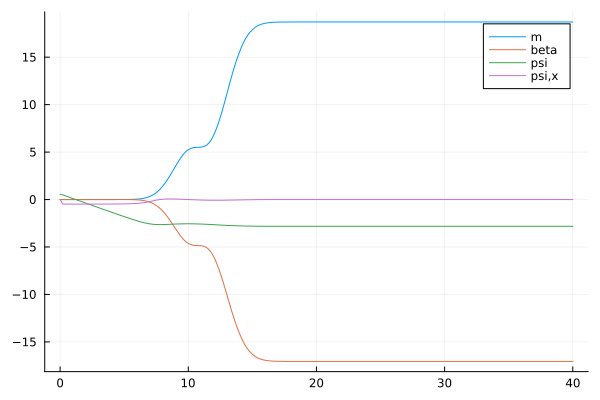

In [180]:
using Plots, CSV, DataFrames
import GR
n=2
time_step=T[n+1]-T[n];
IJulia.clear_output(true)
functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
plot()
    plot1=functions3.Column1[4:L-3];
    plot2=functions3.Column2[4:L-3];
    plot3=functions3.Column3[4:L-3];
    plot4=functions3.Column4[4:L-3];
d=round(T[n],digits=1)
plot!(R1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"]) |> display 
    

## Movie of the evolution

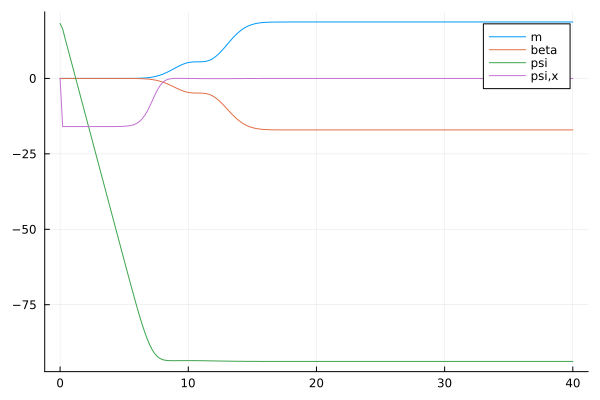

In [92]:
using Plots, CSV, DataFrames
import GR
for n in 1:1:length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
    d=round(T[n],digits=1)
    plot!(R1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"]) |> display 
    
    end

# Interpolation

In [77]:
N=3
x=zeros(N);
y=zeros(N);

x=[1.1, 2.8, 4.7]
x1=[1.1, 2.8, 4.8]
y=[1.5, 4.3, 16.1]

data=[x y];


using Interpolations
data[:,1]=x
data[:,2]=y
itp = cubic_spline_interpolation(10:12, 10:12,  extrapolation_bc = Line()) # create interpolation function
itp(9) # call function on input data (use itp.(x) to broadcast over input vector)

8.999999999999998

In [78]:
itp.([9, 8, 1])

3-element Vector{Float64}:
 8.999999999999998
 7.9999999999999964
 0.999999999999984

In [79]:
itp2 = cubic_spline_interpolation(R[4:L-3], state_array[4:L-3,4],  extrapolation_bc = Line())
itp2.(R)

207-element Vector{Float64}:
 -2.2492802065157096e-5
 -1.49952013767714e-5
 -7.4976006883857e-6
 -4.235164736271502e-22
  7.689629700730104e-6
  1.6552824829107725e-5
  2.7892775217897982e-5
  4.327954001763802e-5
  6.470230120446899e-5
  9.474349404271483e-5
  0.00013678076996669706
  0.00019522129280422345
  0.0002757706956599848
  ⋮
 -2.01566457731864e-39
 -5.719520396176462e-40
 -1.6084935678107224e-40
 -4.483299003815029e-41
 -1.238497196306582e-41
 -3.3908734463825724e-42
 -9.201267173992415e-43
 -2.4745912801619788e-43
 -6.595980413957055e-44
  4.924866297391118e-44
  1.644571300873888e-43
  2.7966559720087055e-43

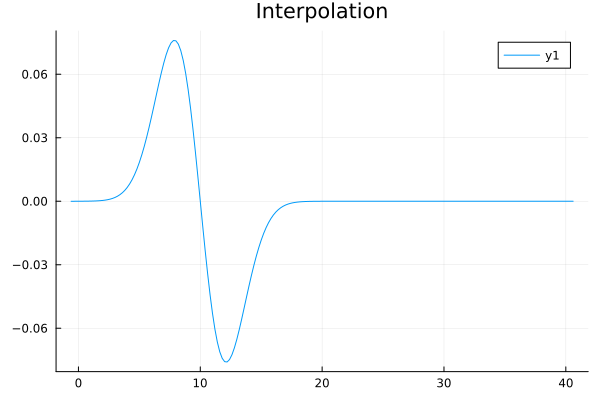

In [80]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R, itp2.(R),title="Interpolation")

In [81]:
psi0=0
SFconstraint_psi_new(psi0,R1) = itp2.(R1)

integration = rungekutta4(SFconstraint_psi_new,psi0,R1)

201-element Vector{Float64}:
  0.0
  7.593615194557902e-7
  3.153733052908858e-6
  7.544874151946501e-6
  1.4579476734114407e-5
  2.5257454987628783e-5
  4.103276552659288e-5
  6.395174800239e-5
  9.683503246584859e-5
  0.00014350975614535846
  0.00020909900645941614
  0.0003003748605932674
  0.00042617989754202296
  ⋮
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6

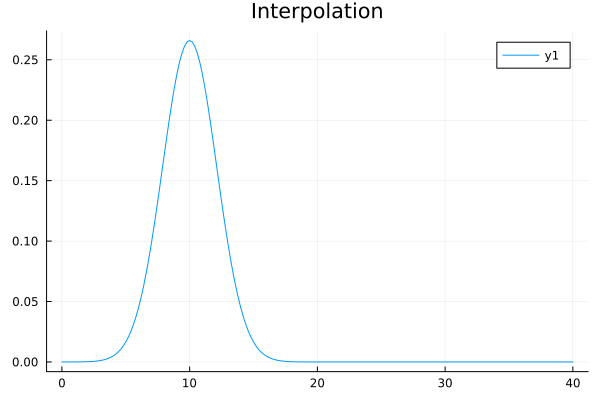

In [82]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R1, integration,title="Interpolation")